In [40]:
%load_ext autoreload
%autoreload 2
import sys
from pathlib import Path
from matplotlib.lines import Line2D

sys.path.append(str(Path("..").resolve()))
from src import *

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


# Metric Visualizer [FFT]

In [76]:
def plot(file):
    df = pd.read_csv(file, index_col="suffx")
    baseline = df.loc["deepcad"]
    df = df.drop(index="deepcad")

    fig, ax1 = plt.subplots(figsize=(18, 9))
    ax1.set_title("FFT Metrics")
    ax1.tick_params(axis="x", labelrotation=90)
    ax1.add_line(Line2D([0, len(df)], [baseline.PSNR] * 2, linestyle="--", linewidth=3, color="tab:blue"))

    ax1.plot(df.index, df["PSNR"], marker="o", markersize=8, color="tab:blue", label="PSNR", linewidth=3)
    ax1.set_ylabel("PSNR (dB)")
    ax1.set_ylim(28, 38)
    ax1.set_yticks(range(28, 38+1, 2))

    ax2 = ax1.twinx()
    ax2.plot(df.index, df["SSIM"], marker="s", markersize=8, linewidth=3, color="tab:orange", label="SSIM")
    ax2.set_ylabel("SSIM")
    ax2.set_ylim(0, 1)
    ax2.set_yticks([0.1*i for i in range(11)])
    ax2.add_line(Line2D([0, len(df)], [baseline.SSIM]*2, linestyle="--", linewidth=3, color="tab:orange"))

    h1, l1 = ax1.get_legend_handles_labels()
    h2, l2 = ax2.get_legend_handles_labels()
    ax1.legend(h1 + h2, l1 + l2, loc="lower right")
    plt.tight_layout()
    plt.show()

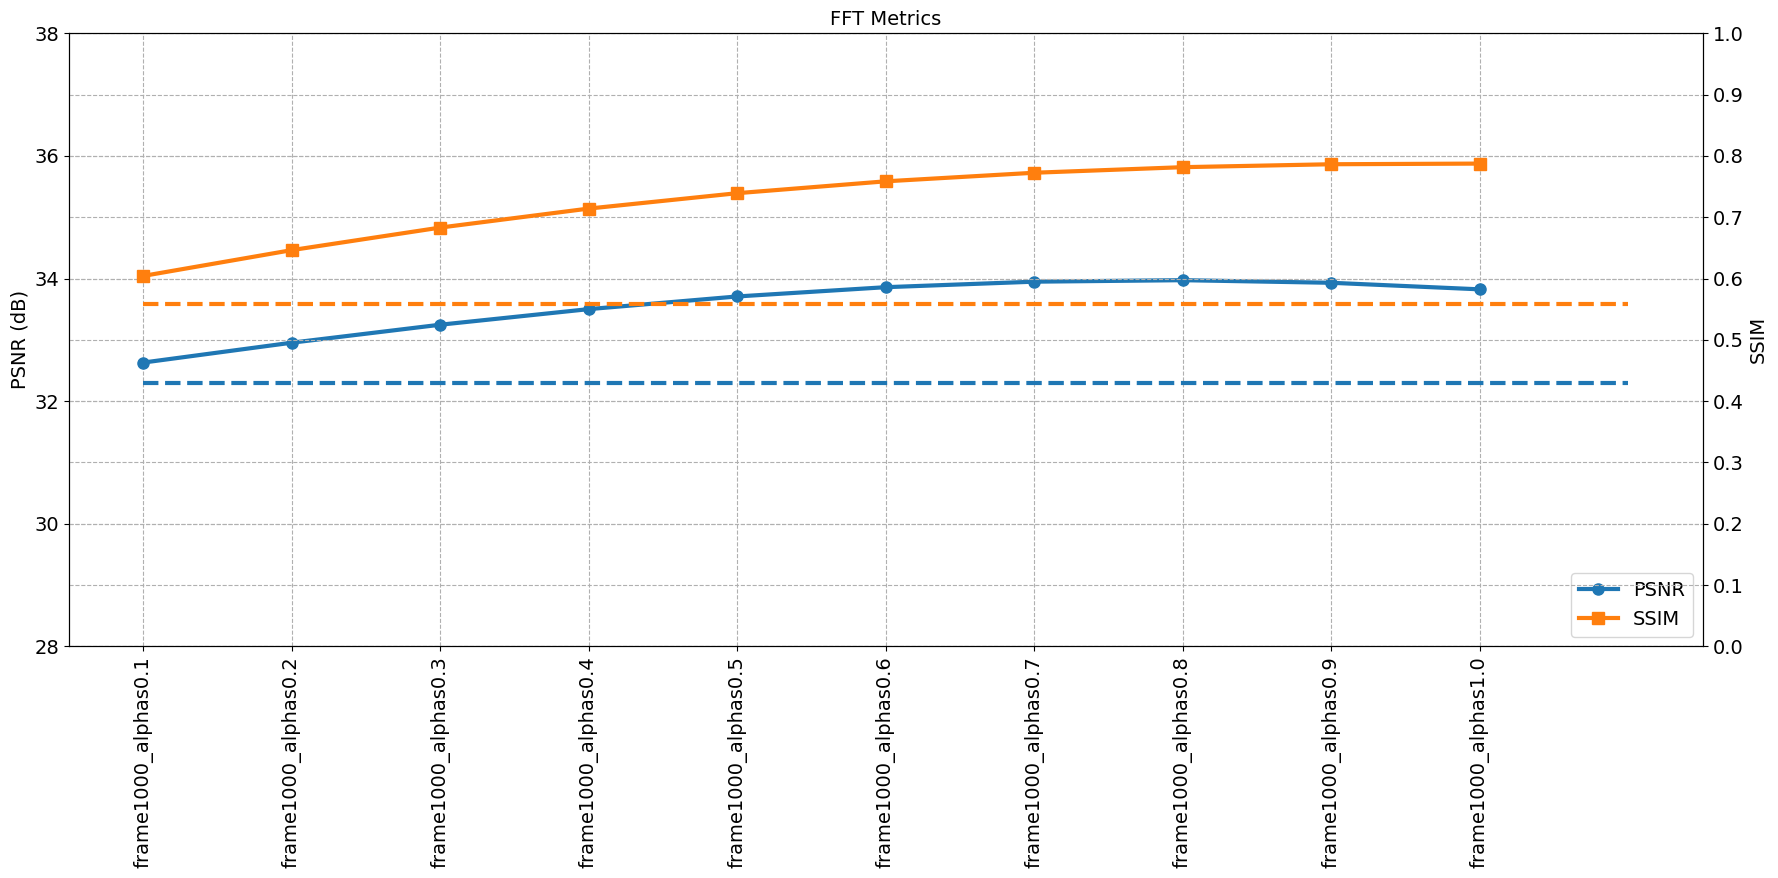

In [79]:
plot("fft_syntethic_metrics_alpha.csv")